# Part II - (FordGoBike Key Findings Presentation)
## by (Jerome Gameli Kofi Davor)

## Investigation Overview


- In my first key presentation I will focus on service usage difference between customers and subscribers. I will also show how age group population and days of the week comes into play.

- My second key presentation would be about user types by distance and whether age group affects users distance.

- My third key presentation insight provides more information about age groups and how distance and speed affects them.


## Dataset Overview

The dataset contains:

- An id for each bicycle
- The trip duration in seconds
- Start time for the trip
- End time for the trip
- The id of the station where the trip started
- The name of the station where the trip started
- The latatitude of the start station
- The longitude of the start station
- The id of the station where the trip ended
- The name of the station where the trip ended
- The latatitude of the end station
- The longitude of the end station
- The users of the GoFord bike service (classified into customers and subscribers)
- The users' birth year
- The users' gender (classified into male, female and others)

__Feature Engineering of dataset__: This was carried out to further derive valuable information from the orignal dataset. They include:

- Trip duration in minutes
- Trip duration in hours
- From users' birth year, users' age were determined
- Month the trip took place
- Days of the week
- Distance travelled in kilometer
- Speed in km/hr
- Age group (classified into young adults, middle aged adults, seniors)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('clean_201902_fordgobike_tripdata.csv', index_col=0)
bike_df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,start_time_month,start_time_dw,distance/km,speed_km/hr,member_age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,Male,No,869.750000,14.495833,Feb,Thu,0.36,0.024835,34,young_adults
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,Male,No,1030.900000,17.181667,Feb,Thu,2.64,0.153652,46,mid_aged_adults
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,Other,No,608.166667,10.136111,Feb,Thu,0.27,0.026637,29,young_adults
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Male,Yes,26.416667,0.440278,Feb,Thu,2.65,6.018927,44,mid_aged_adults
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,Male,No,29.883333,0.498056,Feb,Thu,2.32,4.658115,59,mid_aged_adults


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

- Ride service usage difference between ride user types; customers and subscribers.

    This visualization shows how the users of GoFord Bike service are classified based on user type.

This shows that subcribers use the ride service way more than customers by a ratio of 91% : 9%


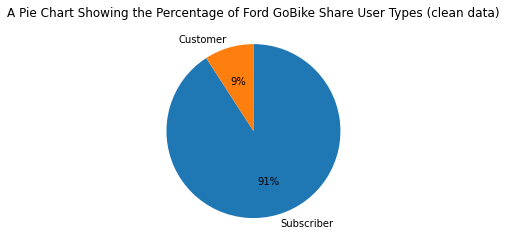

In [3]:
# creating the necessary plot.
data = bike_df['user_type'].value_counts() # returns the value count of each user type in the dataset
# A pie chart is used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('A Pie Chart Showing the Percentage of Ford GoBike Share User Types (clean data)');

print('This shows that subcribers use the ride service way more than customers by a ratio of 91% : 9%')

## (Visualization 2)

- user type vs distance: Does age group determine why customers or users cover a long distance.
        
     The charts show that age group cannot determine why customers or users cover a long distance.

user_type
Customer      1.768851
Subscriber    1.483183
Name: distance/km, dtype: float64

 The chart shows that customers have a higher amount of subscribers


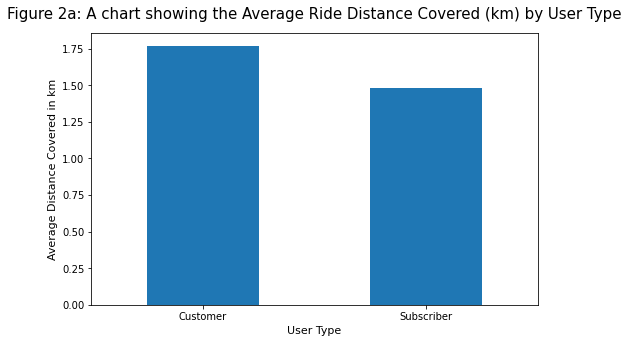

In [6]:
# This plot shows that customers cover longer distances than subscribers.
# figure 2a: Average Ride Distance (km) by each User Type. 
plt.figure(figsize = [8,5])
data = bike_df.groupby('user_type')['distance/km'].mean().plot( kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('User Type', fontsize =11)
plt.ylabel('Average Distance Covered in km', fontsize =11)
plt.title('Figure 2a: A chart showing the Average Ride Distance Covered (km) by User Type',fontsize = 15, y = 1.03);
print(bike_df.groupby('user_type')['distance/km'].mean());
print('\n The chart shows that customers have a higher amount of subscribers')

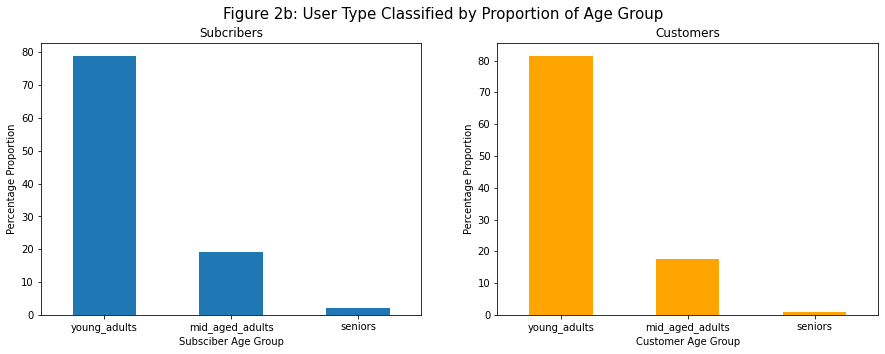

The chart shows that young adults have a higher percentage proportion than other age groups for both user types.
 With subscribers having a higher amount of seniors than customers


In [7]:
#subscriber's population as percentage porpotion
subscriber = bike_df[bike_df['user_type'] == 'Subscriber']
sub_prop = (subscriber['age_group'].value_counts() / subscriber['age_group'].count()) * 100

#customer's population in porpotion
customer = bike_df[bike_df['user_type'] == 'Customer']
cus_prop = (customer['age_group'].value_counts() / customer['age_group'].count()) * 100

#breaking down user type by age group
plt.figure(figsize =[15,5])
plt.suptitle('Figure 2b: User Type Classified by Proportion of Age Group ', fontsize = 15)
plt.subplot(1,2,1)
sub_prop.plot(kind='bar')

plt.xlabel('Subsciber Age Group')
plt.ylabel('Percentage Proportion')
plt.xticks(rotation = 0)
plt.title('Subcribers')


plt.subplot(1,2,2)
cus_prop.plot(kind='bar', color = 'orange')

plt.xlabel('Customer Age Group')
plt.ylabel('Percentage Proportion')
plt.xticks(rotation = 0)
plt.title('Customers')
plt.show()
print('The chart shows that young adults have a higher percentage proportion than other age groups for both user types.\n With subscribers having a higher amount of seniors than customers')

 As figure 2a shows average Ride Distance covered (km) by User Type.
 Figure 2b shows the user type category being broken down into age groups.
 Figure 2c shows the speed of age groups. 

 Relating figure 2c to figure 2b & 2a above; with young adults having a larger population and the highest average speed,this does not have an effect on customers' average distance travelled.

 Since speed is relative, in this case, to distance. Speed is a good way to measure distance travelled and also to determine if age groups can determine customers' longer distance.


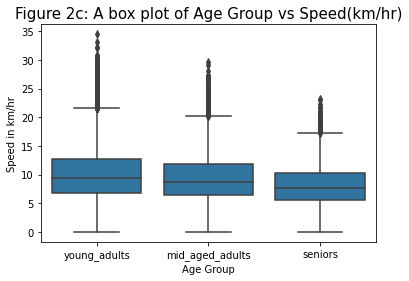

In [9]:
# Figure 2c: Visualizing age group speed. Gives more insight about their distance covered.
plot_color = sb.color_palette()[0]
sb.boxplot(data = bike_df, x = 'age_group', y = 'speed_km/hr', color = plot_color)
plt.title('Figure 2c: A box plot of Age Group vs Speed(km/hr)', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel('Speed in km/hr')
plt.xticks(rotation = 0 );
print(" As figure 2a shows average Ride Distance covered (km) by User Type.\n Figure 2b shows the user type category being broken down into age groups.\n Figure 2c shows the speed of age groups. \n\n Relating figure 2c to figure 2b & 2a above; with young adults having a larger population and the highest average speed,this does not have an effect on customers' average distance travelled.")

print("\n Since speed is relative, in this case, to distance. Speed is a good way to measure distance travelled and also to determine if age groups can determine customers' longer distance.")

#### Conclusion:

Age group of users show that while both user types are populated by young adults (having the highest speed among the age groups as shown in figure 2b), customers still have a higher distance than subscribers. Based on this, age groups can't be used as a determinant

## (Visualization 3)

- age group versus user type and distance: Giving more insights into the relationship between speed, distance and age group

- This further supports the point that young adult riders are more likely to travel at faster speeds and cover longer distances.
- Also there are more young adult riders than middle aged adult riders, and middle aged adult riders than senior riders.
- It is also important to note that distance peaks when users travel at a speed range of 14km/h - 20km/h

Conclusion: The chart clearly shows that young adults are more likely to travel longer distances at a faster speed but it shows no evidence on how this affected customers distance


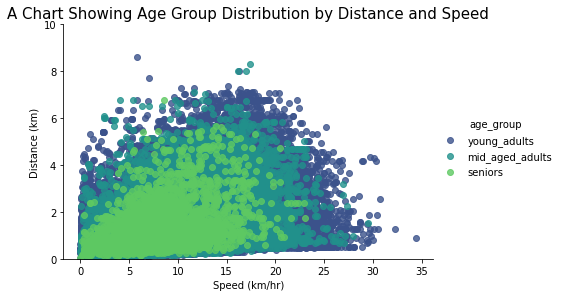

In [11]:

g = sb.FacetGrid(data = bike_df, hue = 'age_group', height = 4, aspect = 1.5, 
                  palette = 'viridis')
g = g.map(sb.regplot,'speed_km/hr','distance/km', x_jitter = 0.04, fit_reg = False)
g.add_legend()         
plt.xlabel('Speed (km/hr)')
plt.ylabel('Distance (km)')
plt.ylim(0,10) # allows for zooming in on highly concentrated data points
plt.title('A Chart Showing Age Group Distribution by Distance and Speed',fontsize = 15);

print('Conclusion: The chart clearly shows that young adults are more likely to travel longer distances at a faster speed but it shows no evidence on how this affected customers distance')


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
